In [36]:

import pandas as pd
import dotenv
import os
from scripts.trend_viewer import *
dotenv.load_dotenv()
_neon_db_url = os.environ.get("NEON_DB_CONSTR")

Control Panel

In [45]:
# Pull price data from db for this ticker
_symbol = 'MES'
_interval = '1m'

In [46]:
stock, regime, peak, fc = get_stock_data(_symbol, _interval, _neon_db_url)

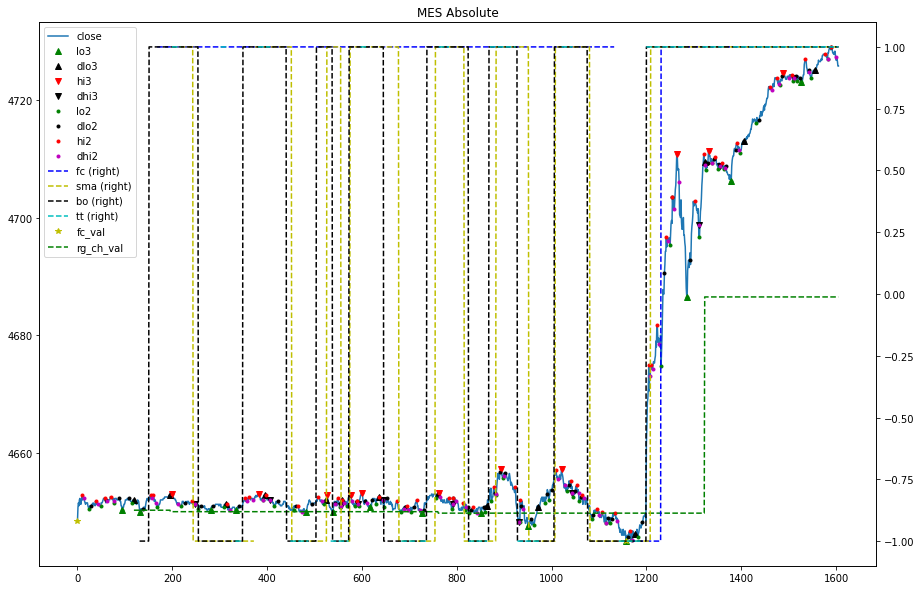

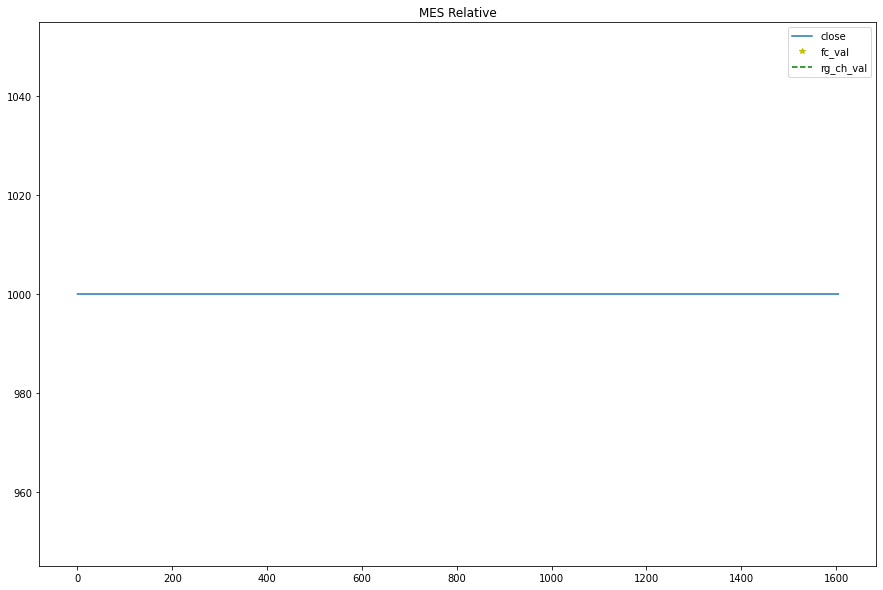

In [47]:
_absolute_stock_data, _relative_stock_data = setup_trend_view_graph(stock, regime, peak, fc)
plot(_absolute_stock_data, f'{_symbol} Absolute')
plot(_relative_stock_data, f'{_symbol} Relative')

In [48]:
import numpy as np
def pyramid(_position, root=2):
    '''
    position is the number of positions
    power is root n. 
    Conservative = 1, aggressive = position, default = 2
    '''
    return 1 / (1+_position) ** (1/root)
def amortized_weight(raw_weight, amortization):
    '''
    raw_weight is the initial position size
    amortization is pyramid(position,root=2)
    '''
    return raw_weight * amortization
weight = 0.1
position = np.arange(1,4)
print('position', position)
print('linear', pyramid(position, root=1) * weight)
print('square root', pyramid(position, root=2) * weight)
print('position n', pyramid(position, root=position) * weight)

position [1 2 3]
linear [0.05       0.03333333 0.025     ]
square root [0.07071068 0.05773503 0.05      ]
position n [0.05       0.05773503 0.06299605]
